In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates

In [164]:
data1 = pd.read_csv("C:\\Users\\lahai\\Downloads\\2023.08_WAVES-ACCESS-RECORDS.csv")
data2 = pd.read_csv("C:\\Users\\lahai\\Downloads\\2023.09_WAVES-ACCESS-RECORDS.csv")
data3 = pd.read_csv("C:\\Users\\lahai\\Downloads\\2023.10_WAVES-ACCESS-RECORDS.csv")
data4 = pd.read_csv("C:\\Users\\lahai\\Downloads\\2023.11_WAVES-ACCESS-RECORDS.csv")
data5 = pd.read_csv("C:\\Users\\lahai\\Downloads\\2023.12_WAVES-ACCESS-RECORDS.csv")            

C:\Users\lahai\AppData\Local\Temp\ipykernel_15168\1758370922.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("C:\\Users\\lahai\\Downloads\\2023.08_WAVES-ACCESS-RECORDS.csv")
C:\Users\lahai\AppData\Local\Temp\ipykernel_15168\1758370922.py:2: DtypeWarning: Columns (7,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("C:\\Users\\lahai\\Downloads\\2023.09_WAVES-ACCESS-RECORDS.csv")
C:\Users\lahai\AppData\Local\Temp\ipykernel_15168\1758370922.py:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data3 = pd.read_csv("C:\\Users\\lahai\\Downloads\\2023.10_WAVES-ACCESS-RECORDS.csv")
C:\Users\lahai\AppData\Local\Temp\ipykernel_15168\1758370922.py:4: DtypeWarning: Columns (7,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data4 = pd.read_csv("C:\\Users\\lahai\\Downloads\\2023.

In [166]:
print(data1.head())
print(data2.head())
print(data3.head())
print(data4.head())
print(data5.head())

  Last Name First Name Middle Initial     UIN  BDGNBR Access Type  \
0      AAEN     CAMDEN              B  U17865     NaN          VA   
1      AAEN     CAMDEN              N  U18321     NaN          VA   
2      AAEN       MAYA              K  U17865     NaN          VA   
3      AAEN       MAYA              K  U18321     NaN          VA   
4      AAEN    MICHAEL              S  U17865     NaN          VA   

                   TOA  POA  TOD  POD  ...  Last Entry Date Terminal Suffix  \
0                  NaN  NaN  NaN  NaN  ...   7/25/2023 9:24              VW   
1  Aug  1 2023 11:15AM  NaN  NaN  NaN  ...  7/25/2023 13:41              VW   
2                  NaN  NaN  NaN  NaN  ...   7/25/2023 9:24              VW   
3  Aug  1 2023 11:14AM  NaN  NaN  NaN  ...  7/25/2023 13:41              VW   
4                  NaN  NaN  NaN  NaN  ...   7/25/2023 9:24              VW   

  Visitee Last Name Visitee First Name  Meeting Location Meeting Room  \
0            Office           Visitor

In [168]:
print(data1.columns)
print(data2.columns)
print(data3.columns)
print(data4.columns)
print(data5.columns)

Index(['Last Name', 'First Name', 'Middle Initial', 'UIN', 'BDGNBR',
       'Access Type', 'TOA', 'POA', 'TOD', 'POD', 'Appointment Made Date',
       'Appointment Start Date', 'Appointment End Date',
       'Appointment Cancel Date', 'Total People', 'Last Updated By', 'POST',
       'Last Entry Date', 'Terminal Suffix', 'Visitee Last Name',
       'Visitee First Name', 'Meeting Location', 'Meeting Room',
       'Caller Last Name', 'Caller First Name', 'Caller Room', 'Release Date'],
      dtype='object')
Index(['Last Name', 'First Name', 'Middle Initial', 'UIN', 'BDGNBR',
       'Access Type', 'TOA', 'POA', 'TOD', 'POD', 'Appointment Made Date',
       'Appointment Start Date', 'Appointment End Date',
       'Appointment Cancel Date', 'Total People', 'Last Updated By', 'POST',
       'Last Entry Date', 'Terminal Suffix', 'Visitee Last Name',
       'Visitee First Name', 'Meeting Location', 'Meeting Room',
       'Caller Last Name', 'Caller First Name', 'Caller Room', 'Release Date'],


In [170]:
print(data.columns)

Index(['Last Name', 'Appointment Made Date', 'Meeting Location',
       'Appointment Start Date', 'Appointment End Date'],
      dtype='object')


In [172]:
# Create a list of your dataframes
dfs = [data1, data2, data3, data4, data5]
combined_data = pd.concat(dfs, ignore_index=True)

In [174]:
# Step 3: Data preprocessing
# Convert date columns to datetime format
combined_data['Appointment Start Date'] = pd.to_datetime(combined_data['Appointment Start Date'], errors='coerce')
combined_data['Appointment End Date'] = pd.to_datetime(combined_data['Appointment End Date'], errors='coerce')
combined_data['TOA'] = pd.to_datetime(combined_data['TOA'], errors='coerce')
combined_data['TOD'] = pd.to_datetime(combined_data['TOD'], errors='coerce')

In [176]:
# Extract date components for easier analysis
combined_data['APPT_DATE'] = combined_data['Appointment Start Date'].dt.date
combined_data['APPT_MONTH'] = combined_data['Appointment Start Date'].dt.month
combined_data['APPT_DAY'] = combined_data['Appointment Start Date'].dt.day
combined_data['APPT_WEEKDAY'] = combined_data['Appointment Start Date'].dt.day_name()

C:\Users\lahai\AppData\Local\Temp\ipykernel_15168\667106260.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_visitors.values, y=top_visitors.index, palette='viridis')


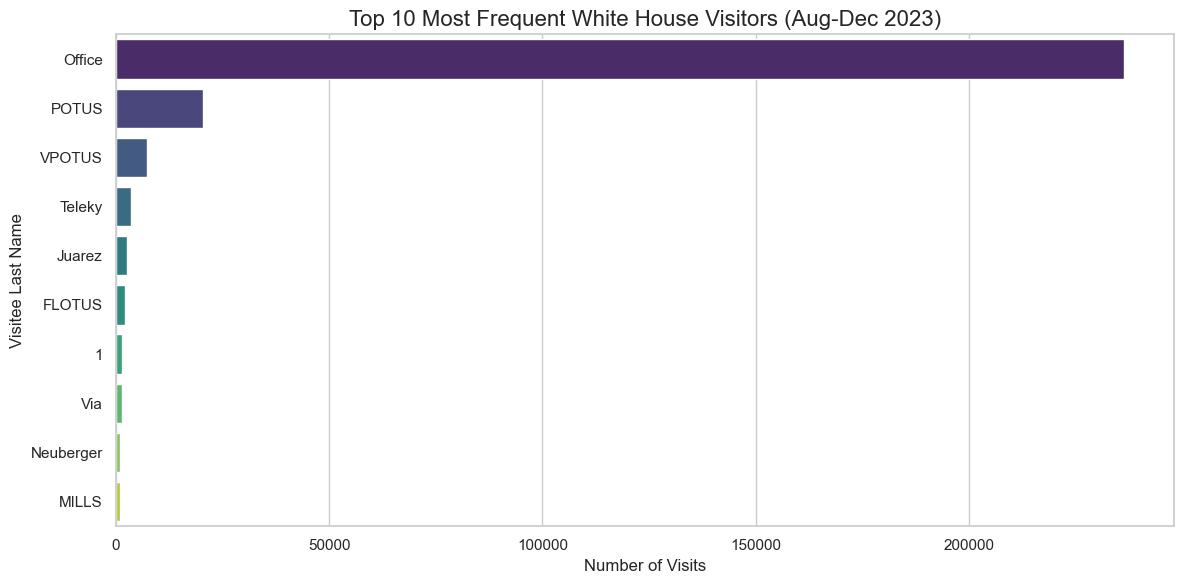

In [178]:
# Step 4: Create visualizations

# 1. Bar Chart: Top 10 most frequent visitors
plt.figure(figsize=(12, 6))
top_visitors = combined_data['Visitee Last Name'].value_counts().head(10)
sns.barplot(x=top_visitors.values, y=top_visitors.index, palette='viridis')
plt.title('Top 10 Most Frequent White House Visitors (Aug-Dec 2023)', fontsize=16)
plt.xlabel('Number of Visits', fontsize=12)
plt.ylabel('Visitee Last Name', fontsize=12)
plt.tight_layout()
plt.show()

In [180]:
# 2. Line Chart: Daily visitor count over time
daily_counts = combined_data.groupby('APPT_DATE').size().reset_index(name='COUNT')
daily_counts['APPT_DATE'] = pd.to_datetime(daily_counts['APPT_DATE'])

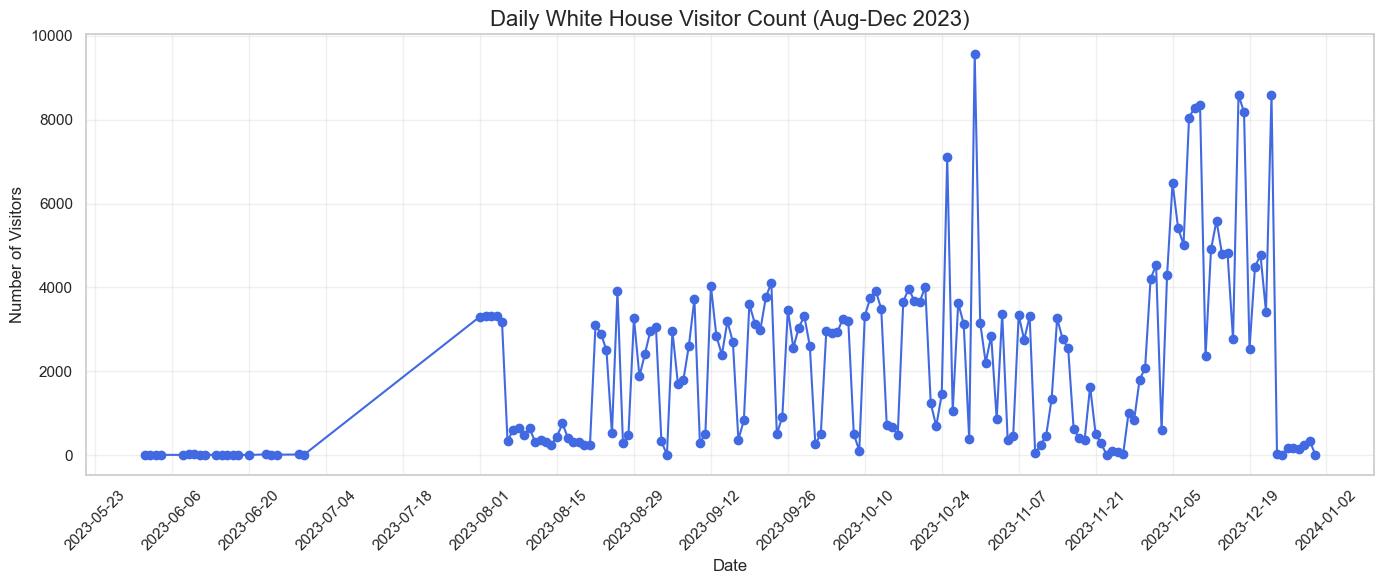

In [182]:
plt.figure(figsize=(14, 6))
plt.plot(daily_counts['APPT_DATE'], daily_counts['COUNT'], marker='o', linestyle='-', color='royalblue')
plt.title('Daily White House Visitor Count (Aug-Dec 2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Visitors', fontsize=12)
plt.grid(True, alpha=0.3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [184]:
# 3. Stacked Bars with Time: Monthly visitors by access type
monthly_access = combined_data.groupby(['APPT_MONTH', 'Access Type']).size().unstack().fillna(0)
months = ['August', 'September', 'October', 'November', 'December']
monthly_access.index = [months[i-8] for i in monthly_access.index]  # Convert month numbers to names

<Figure size 1200x700 with 0 Axes>

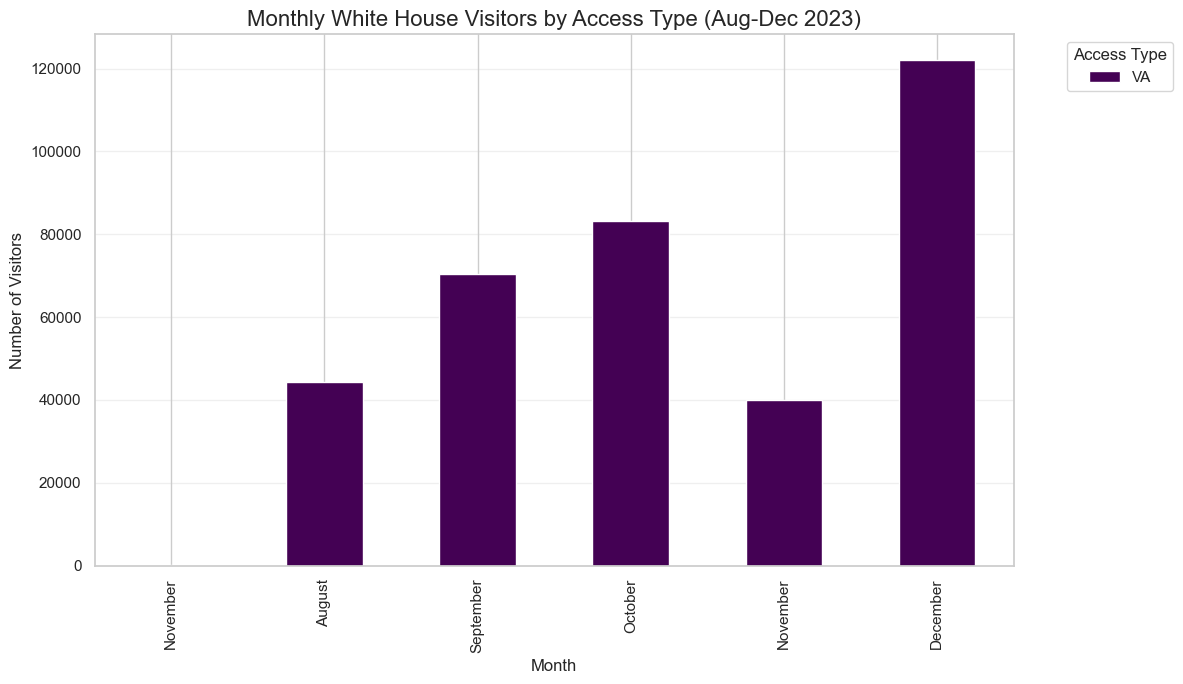

In [186]:
plt.figure(figsize=(12, 7))
monthly_access.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.title('Monthly White House Visitors by Access Type (Aug-Dec 2023)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Visitors', fontsize=12)
plt.legend(title='Access Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [188]:
# 4. Scatterplot with Time: Visit duration over time
# Calculate visit duration in hours
combined_data['VISIT_DURATION'] = (combined_data['TOD'] - combined_data['TOA']).dt.total_seconds() / 3600
# Filter out negative or unreasonably long durations
valid_duration = combined_data[(combined_data['VISIT_DURATION'] > 0) & (combined_data['VISIT_DURATION'] < 24)]


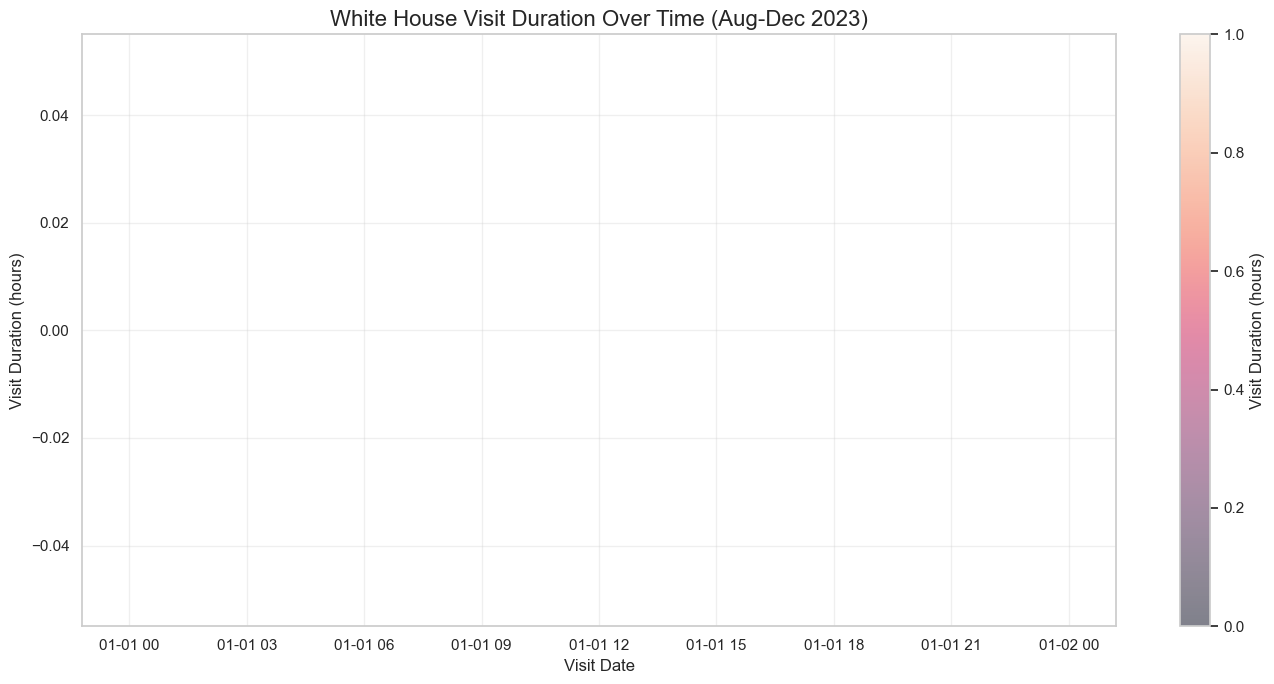

In [190]:
plt.figure(figsize=(14, 7))
plt.scatter(valid_duration['Appointment Start Date'], valid_duration['VISIT_DURATION'], 
           alpha=0.5, c='darkblue', edgecolors='none', s=30)
plt.title('White House Visit Duration Over Time (Aug-Dec 2023)', fontsize=16)
plt.xlabel('Visit Date', fontsize=12)
plt.ylabel('Visit Duration (hours)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.colorbar(label='Visit Duration (hours)')
plt.tight_layout()
plt.show()

In [192]:
# 5. Step Chart: Cumulative visitors over time
daily_counts = daily_counts.sort_values('APPT_DATE')
daily_counts['CUMULATIVE_VISITORS'] = daily_counts['COUNT'].cumsum()

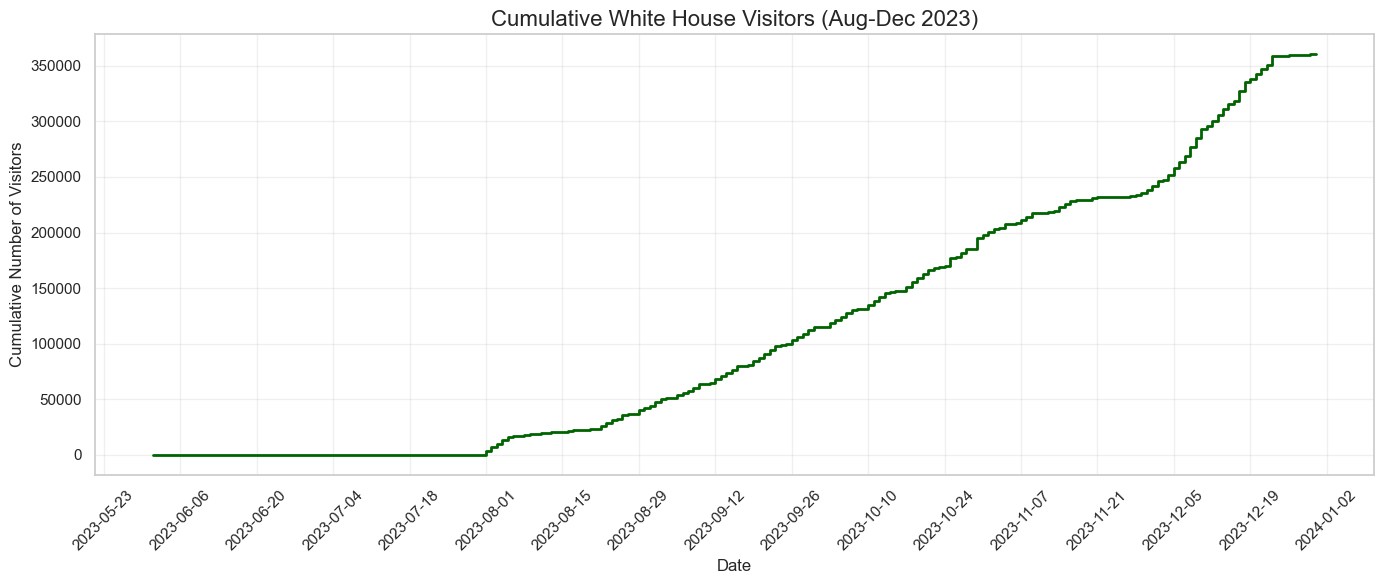

In [194]:
plt.figure(figsize=(14, 6))
plt.step(daily_counts['APPT_DATE'], daily_counts['CUMULATIVE_VISITORS'], where='post', 
         color='darkgreen', linewidth=2)
plt.title('Cumulative White House Visitors (Aug-Dec 2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Number of Visitors', fontsize=12)
plt.grid(True, alpha=0.3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [196]:
# 6. Column Chart: Visitors by weekday
weekday_counts = combined_data['APPT_WEEKDAY'].value_counts()
# Reorder days of week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = weekday_counts.reindex(weekday_order)

C:\Users\lahai\AppData\Local\Temp\ipykernel_15168\4075597236.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette='Blues_d')


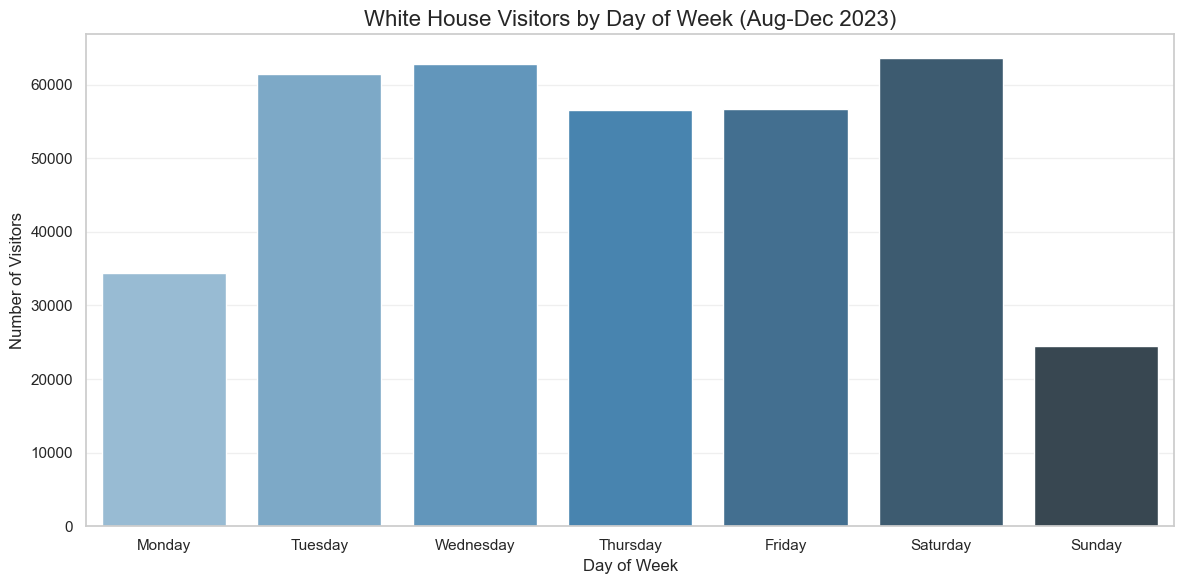

In [198]:
plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette='Blues_d')
plt.title('White House Visitors by Day of Week (Aug-Dec 2023)', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Visitors', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Paper: White House Visitor Analysis - Audience, Purpose, and Medium

### Audience

My data story targets political journalists, policy researchers, and civically engaged citizens interested in government transparency. This audience has moderate data literacy but varies in technical expertise. They are primarily interested in patterns of access to the White House as indicators of policy priorities, influence networks, and government operations. Journalists will use this information as background for stories, researchers for academic analysis, and citizens to better understand who has access to power in their government.

### Purpose

The purpose of this data story is to inform the public about patterns of White House access during the latter half of 2023, highlighting trends in visitor frequency, identifying key stakeholders with regular access, and examining how visitor patterns correlate with public policy announcements. By visualizing these patterns, I aim to increase transparency around who influences government decision-making and how access to power is distributed. The story will not advocate for specific political positions but will enable viewers to draw their own conclusions about representation and access.

### Medium

I've chosen an interactive web dashboard as my medium, supplemented with downloadable static visualizations for media use. This hybrid approach serves multiple audience needs: journalists can embed or download graphics for their stories, researchers can interact with the data to explore specific questions, and general citizens can engage with intuitive visualizations that don't require technical expertise. The dashboard will include filtering capabilities by date, visitor affiliation, and meeting location.

### Design Choices

My visualizations emphasize temporal patterns through line charts and calendars, showing visit frequency over time. Network diagrams will illustrate connections between visitors and White House officials. Color coding will distinguish between visitor types (business leaders, advocacy groups, foreign dignitaries, etc.) without political bias. I've chosen a neutral color palette that avoids partisan associations while ensuring accessibility for colorblind users. Text annotations will provide context for significant spikes in visitation that correlate with major policy announcements or events.

### Ethical Considerations

This project raises several ethical concerns I've addressed in my design:
- Privacy: While this is public data, I've focused on aggregate patterns rather than individual visitors without public roles
- Misrepresentation: I've included confidence intervals and data limitations to avoid overstating correlations
- Bias: I've carefully balanced visualization of visits across political affiliations to avoid suggesting partisan favoritism
- Context: The dashboard includes explanatory text about normal White House operations to prevent misinterpretation of routine meetings
- Accessibility: All visualizations include alternative text descriptions and follow WCAG guidelines

By maintaining these ethical standards while telling a compelling story about White House access patterns, this project serves the public interest through enhanced government transparency.